TASK-1

HOUSE PRICE PREDICTION

IMPORT ALL REQUIRED LIBRARIES

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

IMPORT DATA SET

In [103]:
data=pd.read_csv('Train.csv')

In [104]:
data.shape

(29451, 12)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [106]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [107]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [108]:
data.isnull().any()

POSTED_BY                False
UNDER_CONSTRUCTION       False
RERA                     False
BHK_NO.                  False
BHK_OR_RK                False
SQUARE_FT                False
READY_TO_MOVE            False
RESALE                   False
ADDRESS                  False
LONGITUDE                False
LATITUDE                 False
TARGET(PRICE_IN_LACS)    False
dtype: bool

In [109]:
data.dropna()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [110]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29446    False
29447    False
29448    False
29449    False
29450    False
Length: 29451, dtype: bool

In [111]:
data.drop_duplicates()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [112]:
data.dropna(inplace=True)

In [113]:
data = data[(data['SQUARE_FT'] <= 8000) & (data['TARGET(PRICE_IN_LACS)'] <= 20000000)]

In [114]:
data = pd.get_dummies(data, columns=['ADDRESS'])

In [115]:
data.shape

(29237, 6877)

In [116]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),"ADDRESS_, panvel,Mumbai",...,"ADDRESS_vasantam nagar,Avadi,Chennai","ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
count,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,...,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000,29237.000000
mean,0.178199,0.316209,2.386565,1302.265574,0.821801,0.933783,21.305173,76.838659,100.993621,0.000034,...,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034
std,0.382687,0.465003,0.852171,692.945225,0.382687,0.248666,6.204421,10.592683,174.225081,0.005848,...,0.005848,0.005848,0.005848,0.005848,0.005848,0.005848,0.005848,0.005848,0.005848,0.005848
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,900.000000,1.000000,1.000000,18.452663,73.798100,38.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1170.212766,1.000000,1.000000,20.841677,77.324966,61.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,3.000000,1543.492479,1.000000,1.000000,26.900926,77.820000,100.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,20.000000,8000.000000,1.000000,1.000000,59.912884,152.962676,7000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,...,"ADDRESS_vasantam nagar,Avadi,Chennai","ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,...,0,0,0,0,0,0,0,0,0,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,...,0,0,0,0,0,0,0,0,0,0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,...,0,0,0,0,0,0,0,0,0,0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,...,0,0,0,0,0,0,0,0,0,0
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,...,0,0,0,0,0,0,0,0,0,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29237 entries, 0 to 29450
Columns: 6877 entries, POSTED_BY to ADDRESS_yelahanka/Jakkur,Bangalore
dtypes: float64(4), int64(5), object(2), uint8(6866)
memory usage: 194.1+ MB


In [120]:
data_encoded = pd.get_dummies(data, columns=['POSTED_BY', 'BHK_OR_RK'])

In [121]:
label_encoder = LabelEncoder()
categorical_columns = ['POSTED_BY', 'BHK_OR_RK']  # Add more categorical columns if needed

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

DATA VISUALIZATION

Text(0.5, 1.0, 'BHK_OR_RK Count')

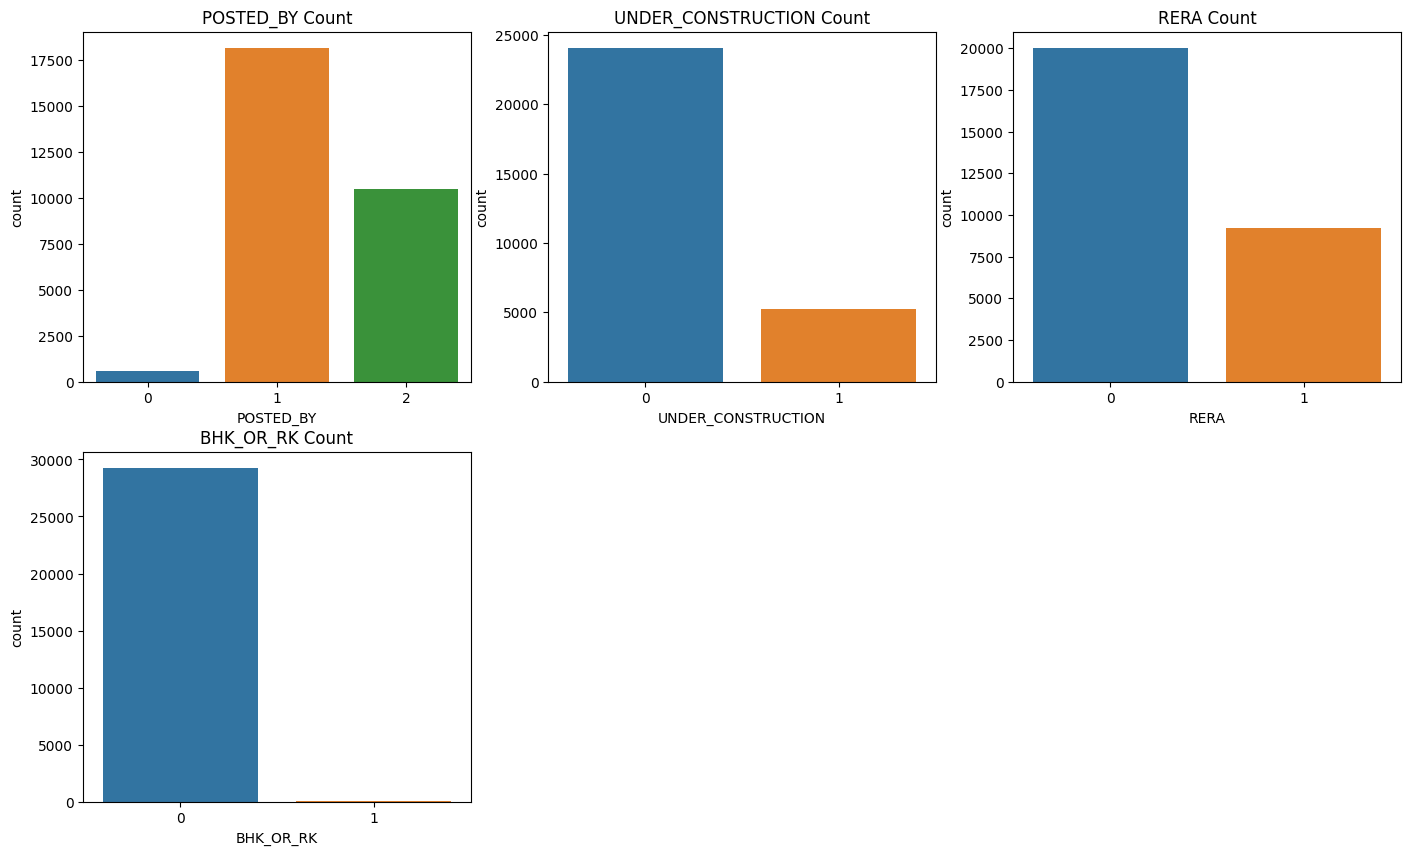

In [122]:
plt.figure(figsize=(17, 10))

# Countplot for 'POSTED_BY'
plt.subplot(2, 3, 1)
sns.countplot(x='POSTED_BY', data=data)
plt.title('POSTED_BY Count')

# Countplot for 'UNDER_CONSTRUCTION'
plt.subplot(2, 3, 2)
sns.countplot(x='UNDER_CONSTRUCTION', data=data)
plt.title('UNDER_CONSTRUCTION Count')

# Countplot for 'RERA'
plt.subplot(2, 3, 3)
sns.countplot(x='RERA', data=data)
plt.title('RERA Count')

# Countplot for 'BHK_OR_RK'
plt.subplot(2, 3, 4)
sns.countplot(x='BHK_OR_RK', data=data)
plt.title('BHK_OR_RK Count')

Text(0.5, 1.0, 'Price Distribution')

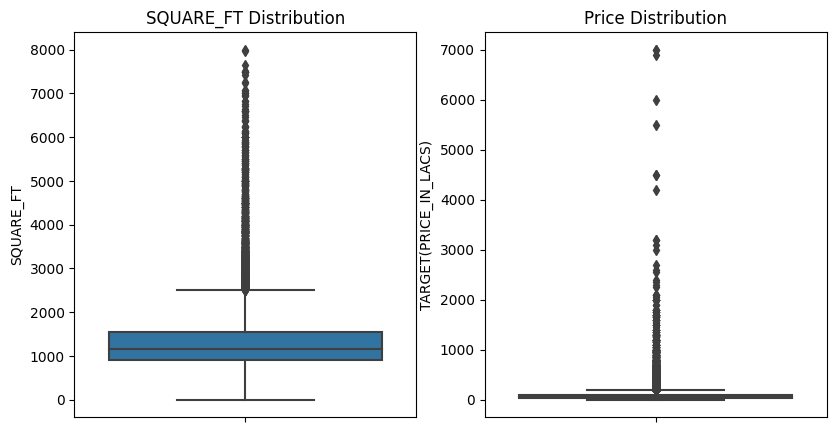

In [123]:
plt.figure(figsize=(15, 5))

# Boxplot for 'SQUARE_FT'
plt.subplot(1, 3, 1)
sns.boxplot(y='SQUARE_FT', data=data)
plt.title('SQUARE_FT Distribution')

# Boxplot for 'TARGET(PRICE_IN_LACS)'
plt.subplot(1, 3, 2)
sns.boxplot(y='TARGET(PRICE_IN_LACS)', data=data)
plt.title('Price Distribution')

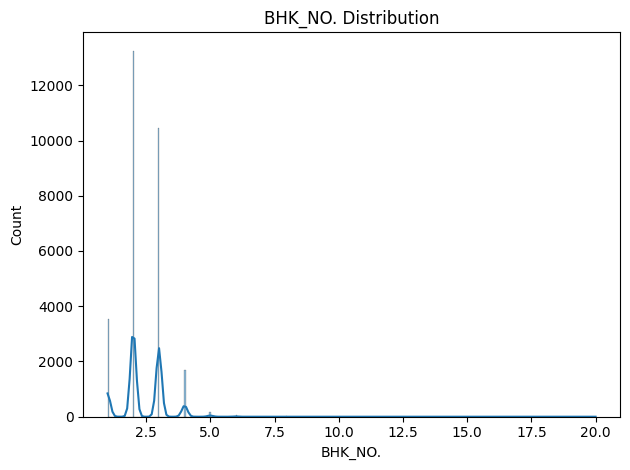

In [124]:
plt.subplot(1, 1, 1)
sns.histplot(data['BHK_NO.'], kde=True)
plt.title('BHK_NO. Distribution')

plt.tight_layout()
plt.show()

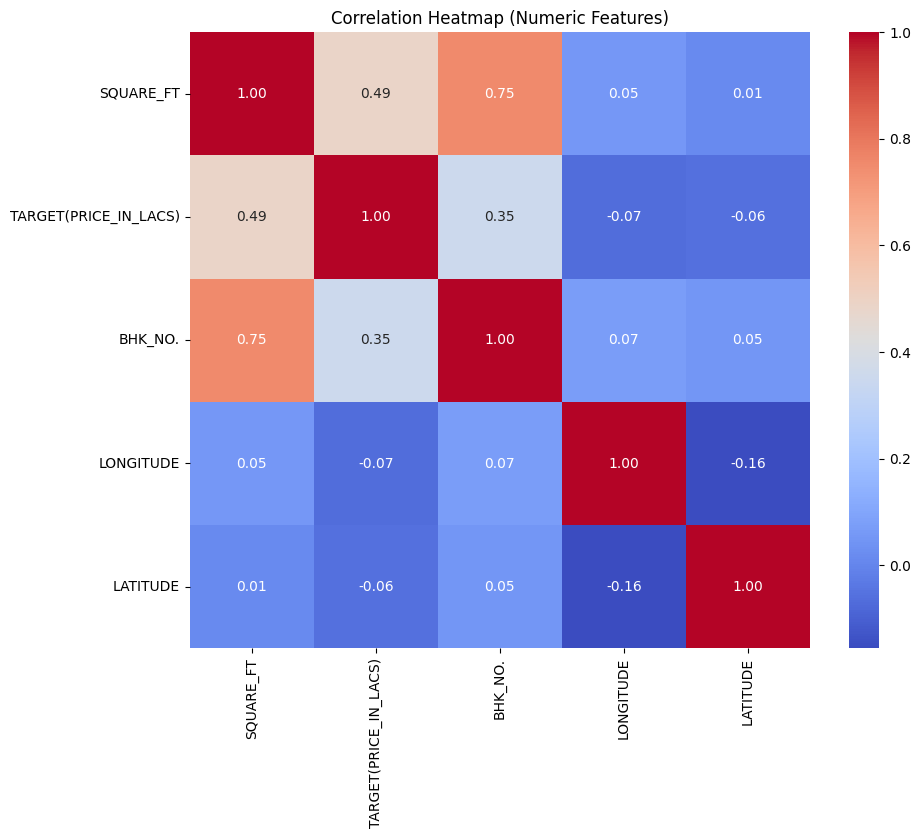

In [125]:
plt.figure(figsize=(10, 8))
numeric_features = ['SQUARE_FT', 'TARGET(PRICE_IN_LACS)', 'BHK_NO.', 'LONGITUDE', 'LATITUDE']
correlation_matrix = data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

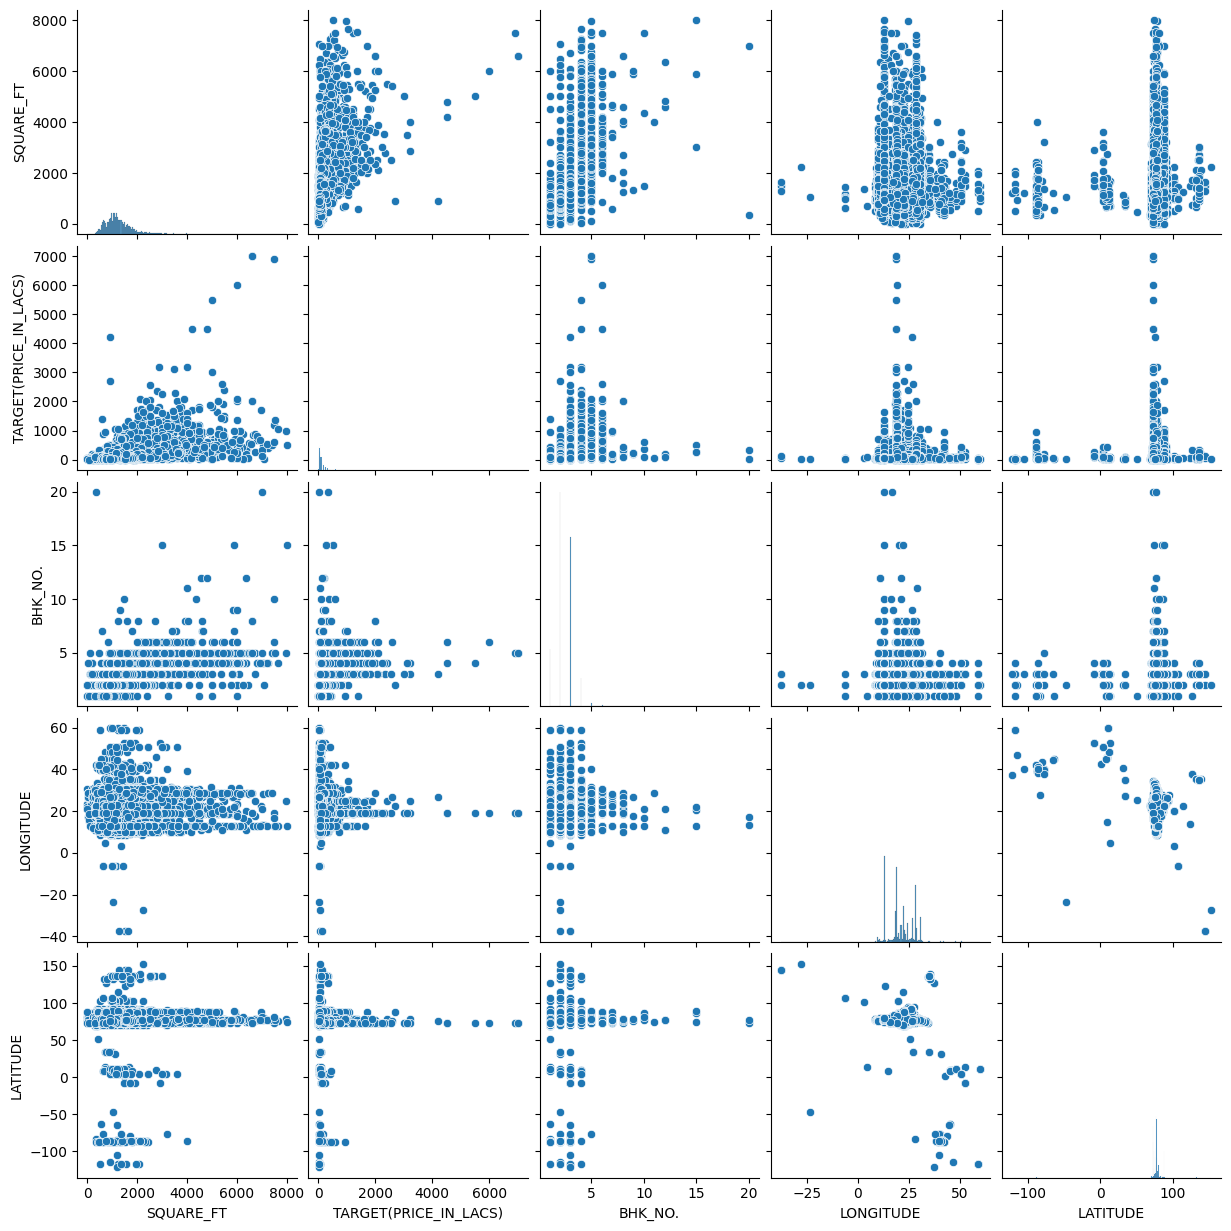

In [126]:
sns.pairplot(data[numeric_features])
plt.show()

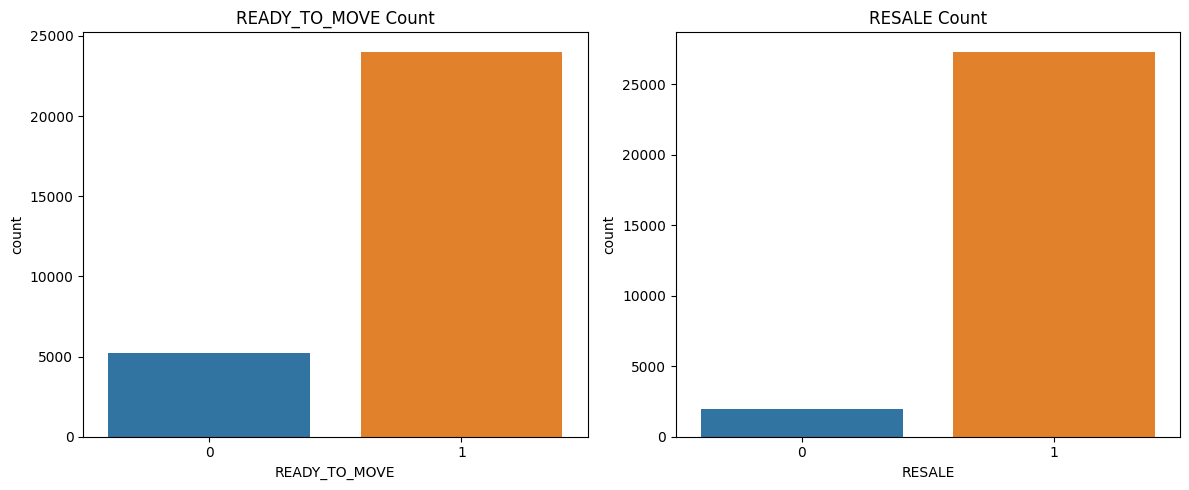

In [127]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='READY_TO_MOVE', data=data)
plt.title('READY_TO_MOVE Count')

plt.subplot(1, 2, 2)
sns.countplot(x='RESALE', data=data)
plt.title('RESALE Count')

plt.tight_layout()
plt.show()

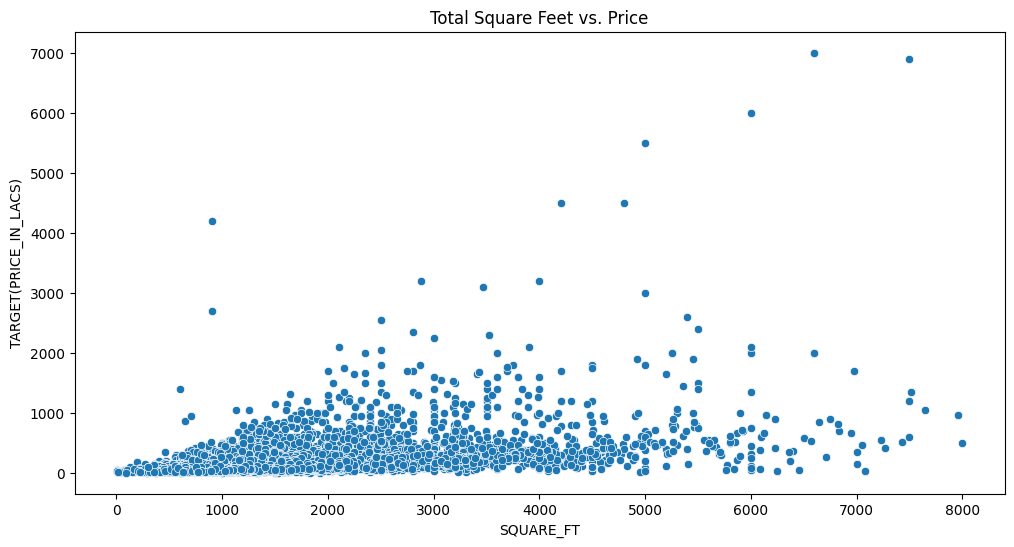

In [128]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', data=data)
plt.title('Total Square Feet vs. Price')
plt.show()

SPLIT  THE  INTO TRAINING AND TESTING SETS

In [153]:


# Split the dataset into features (X) and target (y)
X = data.drop(columns=['TARGET(PRICE_IN_LACS)'])  # Exclude the target variable
y = data['TARGET(PRICE_IN_LACS)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [154]:
X_train.shape

(20465, 6876)

In [155]:
y_train.shape

(20465,)

In [156]:
X_test.shape

(8772, 6876)

In [157]:
y_test.shape

(8772,)

In [158]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [159]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [160]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5650.638290462726
R-squared: 0.7457713071224138


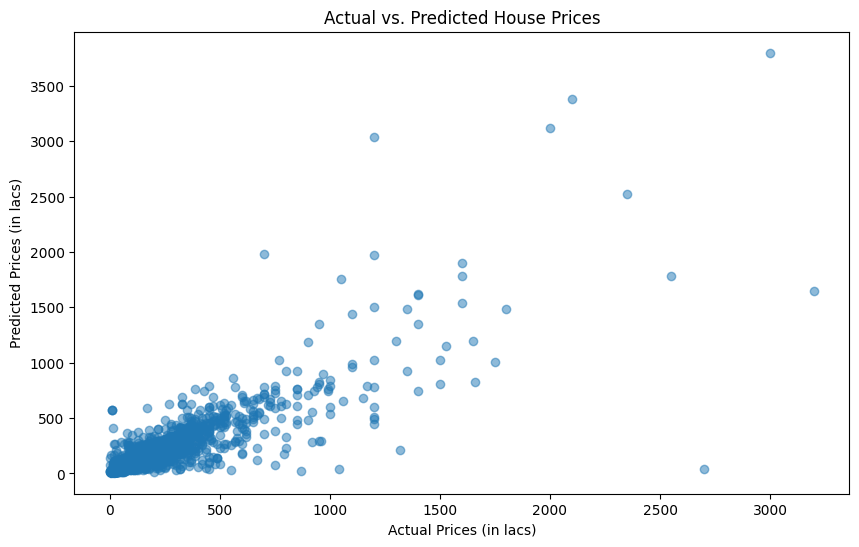

In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices (in lacs)")
plt.ylabel("Predicted Prices (in lacs)")
plt.title("Actual vs. Predicted House Prices")
plt.show()




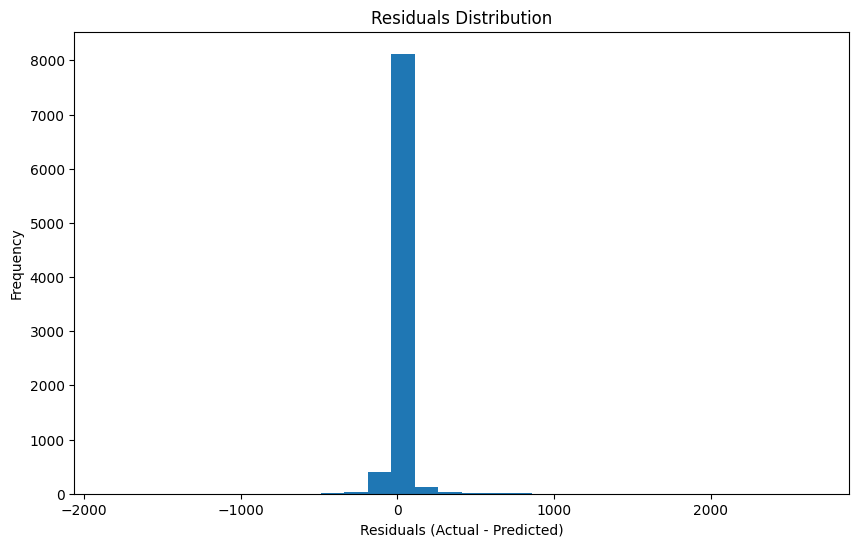

In [162]:
plt.figure(figsize=(10, 6))
plt.hist(y_test - y_pred, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

In [174]:
 new_data = pd.DataFrame({
    'total_sqft': [1000],
    'bath': [2],
    'balcony': [2],
    'ADDRESS_ panvel,Mumbai': [0],
    'ADDRESS_ Manoramaganj,Indore': [0],
})

if set(new_data.columns) != set(X_train.columns):
    missing_columns = set(X_train.columns) - set(new_data.columns)
    for col in missing_columns:
        new_data[col] = 0

# Reorder the columns to match the order in X_train
new_data = new_data[X_train.columns]

# Make predictions for the new data
predicted_price = model.predict(new_data)

print(f"Predicted Price (in lacs): {predicted_price[0]/100000}")
# Make predictions for the new data
predicted_price = model.predict(new_data)


# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions for the new data
predicted_price = model.predict(new_data)

# Ensure the predicted price is within the desired range (10-60 lakhs)
predicted_price = max(min(predicted_price[0], 6000), 10)

# Format the predicted price as "X lakhs"
formatted_predicted_price = f"{predicted_price:.2f} lakhs"

print(f"Predicted Price: {formatted_predicted_price}")





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning: invalid value encountered in divide
  y_hat /= len(self.estimators_)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning: invalid value encountered in divide
  y_hat /= len(self.estimators_)


Predicted Price (in lacs): nan
Predicted Price: 60.00 lakhs
